In [1]:
import sys
sys.path.append("/users/munozr/mycodes")
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from data_analysis_codes.tools import LinData
from data_analysis_codes.tools import ReadingTools as RRead
from data_analysis_codes.tools import Cstyle
plt.style.use(Cstyle.style1)

In [3]:
allparam = [RRead.read_parameters('pflrw_d3e2_L1821_t1_N128_LCDM_Q1D30bde_TV')]
allparam += [RRead.read_parameters('pflrw_d3e2_L1821_t1_N128_LCDM_Q1D20bde_TV')]
allparam += [RRead.read_parameters('pflrw_d3e2_L1821_t1_N128_LCDM_Q1D10bde_TV')]
allparam += [RRead.read_parameters('pflrw_d3e2_L1821_t1_N128_LCDM')]
Leqid = len(allparam)
allparam += [RRead.read_parameters('pflrw_d3e2_L1821_t1_N128_LCDM_Q1D5sde_TV')]
allparam += [RRead.read_parameters('pflrw_d3e2_L1821_t1_N128_LCDM_Q1D10sde_TV')]
allparam += [RRead.read_parameters('pflrw_d3e2_L1821_t1_N128_LCDM_Q1D15sde_TV')]
allparam += [RRead.read_parameters('pflrw_d3e2_L1821_t1_N128_LCDM_Q1D20sde_TV')]
allparam += [RRead.read_parameters('pflrw_d3e2_L1821_t1_N128_LCDM_Q1D30sde_TV')]
allparam += [RRead.read_parameters('pflrw_d3e2_L1821_t1_N128_LCDM_Q1D40sde_TV')]
allparam += [RRead.read_parameters('pflrw_d3e2_L1821_t1_N128_LCDM_Q1D50sde_TV')]
Lin128 = LinData.LinData_Class(allparam[0])
alldata = [pd.read_table(param['datapath']+'h5_data.csv', delimiter=',') for param in allparam]

allparam64 = [RRead.read_parameters('pflrw_d3e2_L1821_t1_N64_LCDM_Q1D30bde_TV')]
allparam64 += [RRead.read_parameters('pflrw_d3e2_L1821_t1_N64_LCDM_Q1D20bde_TV')]
allparam64 += [RRead.read_parameters('pflrw_d3e2_L1821_t1_N64_LCDM_Q1D10bde_TV')]
allparam64 += [RRead.read_parameters('pflrw_d3e2_L1821_t1_N64_LCDM')]
allparam64 += [RRead.read_parameters('pflrw_d3e2_L1821_t1_N64_LCDM_Q1D5sde_TV')]
allparam64 += [RRead.read_parameters('pflrw_d3e2_L1821_t1_N64_LCDM_Q1D10sde_TV')]
allparam64 += [RRead.read_parameters('pflrw_d3e2_L1821_t1_N64_LCDM_Q1D15sde_TV')]
allparam64 += [RRead.read_parameters('pflrw_d3e2_L1821_t1_N64_LCDM_Q1D20sde_TV')]
allparam64 += [RRead.read_parameters('pflrw_d3e2_L1821_t1_N64_LCDM_Q1D30sde_TV')]
allparam64 += [RRead.read_parameters('pflrw_d3e2_L1821_t1_N64_LCDM_Q1D40sde_TV')]
allparam64 += [RRead.read_parameters('pflrw_d3e2_L1821_t1_N64_LCDM_Q1D50sde_TV')]
Lin64 = LinData.LinData_Class(allparam64[0])
alldata64 = [pd.read_table(param['datapath']+'h5_data.csv', delimiter=',') for param in allparam64]

allparam32 = [RRead.read_parameters('pflrw_d3e2_L1821_t1_N32_LCDM_Q1D30bde_TV')]
allparam32 += [RRead.read_parameters('pflrw_d3e2_L1821_t1_N32_LCDM_Q1D20bde_TV')]
allparam32 += [RRead.read_parameters('pflrw_d3e2_L1821_t1_N32_LCDM_Q1D10bde_TV')]
allparam32 += [RRead.read_parameters('pflrw_d3e2_L1821_t1_N32_LCDM')]
allparam32 += [RRead.read_parameters('pflrw_d3e2_L1821_t1_N32_LCDM_Q1D5sde_TV')]
allparam32 += [RRead.read_parameters('pflrw_d3e2_L1821_t1_N32_LCDM_Q1D10sde_TV')]
allparam32 += [RRead.read_parameters('pflrw_d3e2_L1821_t1_N32_LCDM_Q1D15sde_TV')]
allparam32 += [RRead.read_parameters('pflrw_d3e2_L1821_t1_N32_LCDM_Q1D20sde_TV')]
allparam32 += [RRead.read_parameters('pflrw_d3e2_L1821_t1_N32_LCDM_Q1D30sde_TV')]
allparam32 += [RRead.read_parameters('pflrw_d3e2_L1821_t1_N32_LCDM_Q1D40sde_TV')]
allparam32 += [RRead.read_parameters('pflrw_d3e2_L1821_t1_N32_LCDM_Q1D50sde_TV')]
Lin32 = LinData.LinData_Class(allparam32[0])
alldata32 = [pd.read_table(param['datapath']+'h5_data.csv', delimiter=',') for param in allparam32]

 read time file
 read time file
 read time file


In [4]:
Lx = np.array([paramdata['Lx'] for paramdata in allparam])

In [5]:
def interpolate(f):
    f_save = [f[0]]
    for i in range(len(f)-1):
        f_save += [np.average([f[i], f[i+1]]), f[i+1]]
    return np.array(f_save)

def extrapolate(f):
    return np.append(f, f[-1]+f[-1]-f[-2])

def get_error(f32, f64, f128):
    if len(f32)!=len(f128):
        f32 = interpolate(interpolate(f32))
        while len(f32)<len(f128):
            f32 = extrapolate(f32)
        while len(f32)>len(f128):
            f32 = f32[:-1]
    if len(f64)!=len(f128):
        f64 = interpolate(f64)
        while len(f64)<len(f128):
            f64 = extrapolate(f64)
        while len(f64)>len(f128):
            f64 = f64[:-1]
    c = abs(f32-f64)/abs(f64-f128)
    err = abs((f64-f128)/(c-1))
    for ic in range(len(c)):
        if err[ic]>abs(f32[ic]-f64[ic]) or err[ic]>abs(f64[ic]-f128[ic]):
            err[ic] = np.max([abs(f32[ic]-f64[ic]), abs(f64[ic]-f128[ic])])
    return err

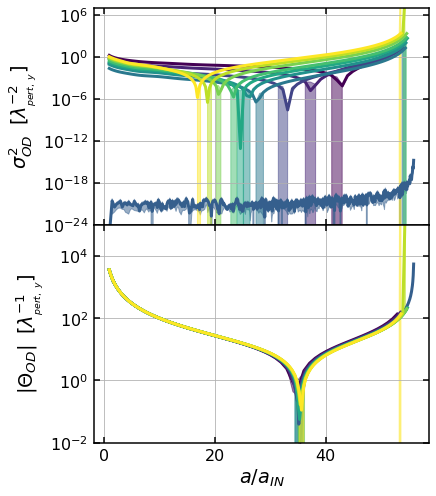

In [10]:
colors = plt.cm.viridis(np.linspace(0, 1, len(Lx)))
Ly = allparam[0]['Ly']
L2 = Ly**2
alphafac = 0.5

plt.figure(figsize = (6, 8))
plt.subplot(211)
for d128, d64, d32, c in zip(alldata, alldata64, alldata32, colors):
    an128 = Lin128.an_initial(d128['t'])
    plt.semilogy(an128, d128['A2_OD']*L2, color=c)
    err = get_error(d32['A2_OD'], d64['A2_OD'], d128['A2_OD'])
    plt.fill_between(an128, (d128['A2_OD']-err)*L2, (d128['A2_OD']+err)*L2, color=c, alpha=alphafac)
plt.ylabel(r'$\sigma^{2}_{OD} \;\; [\lambda_{{}_{pert, \; y}}^{-2}]$')
plt.grid()
plt.ylim(1e-24, 1e7)

plt.subplot(212)
for d128, d64, d32, c in zip(alldata, alldata64, alldata32, colors):
    an128 = Lin128.an_initial(d128['t'])
    f128 = abs(d128['K_OD']*Ly)
    plt.semilogy(an128, f128, color=c)
    err = get_error(abs(d32['K_OD']*Ly), abs(d64['K_OD']*Ly), f128)
    plt.fill_between(an128, f128-err, f128+err, color=c, alpha=alphafac)
    plt.ylabel(r'$|\Theta_{OD}| \;\; [\lambda_{{}_{pert, \; y}}^{-1}]$')
plt.xlabel(r'$a/a_{IN}$')
plt.grid()
plt.ylim(1e-2, 1e5)

plt.subplots_adjust(hspace=0)